<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> <font color="blue"> Solutions for </font>Phase Kickback with ProjectQ</b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task1"></a>
<h3> Task 1</h3>

Create a quantum circuit with two qubits, say $ q[0] $ and $ q[6] $ in the reading order of ProjectQ.

We start in quantum state $ \ket{01} $:
- set the state of $ q[1] $ to $ \ket{0} $, and
- set the state of $ q[0] $ to $ \ket{1} $.

Apply Hadamard to both qubits.

Apply CNOT operator, where the controller qubit is $ q[1] $ and the target qubit is $ q[0] $.

Apply Hadamard to both qubits.

Measure the outcomes.

<h3> Solution </h3>

(<Figure size 461.851x216 with 1 Axes>, <AxesSubplot:>)
Measured [1, 1]


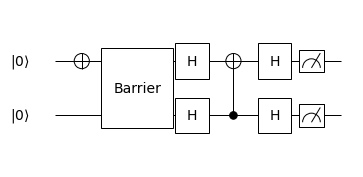

In [1]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define number of qubits and allocate them
qubit = qengine.allocate_qureg(2)

# the up_qubit is in |0>
# set the down qubit to |1>
X | qubit[0]

# Apply barrier gate
Barrier | qubit

# Apply Hadamard to both qubits
All(H) | qubit

# Apply CNOT operator, where the controller qubit is the up qubit and the target qubit is the down qubit.
C(NOT) | (qubit[1],qubit[0])

# Apply Hadamard to both qubits
All(H) | qubit

# Flush engine to backend
qengine.flush()

# Measure Qubits
All(Measure)| qubit

# Draw Circuit and print measurements
print(qdrawer.draw())
print("Measured {}".format([int(q) for q in qubit]))

<a id="task2"></a>
<h3> Task 2 </h3>

Create a circuit with 7 qubits, say $ q[0],\ldots,q[6] $ in the reading order of ProjectQ.

Set the states of the top six qubits to $ \ket{0} $.

Set the state of the bottom qubit to $ \ket{1} $.

Apply Hadamard operators to all qubits.

Apply CNOT operator ($q[1]$,$q[0]$) 
<br>
Apply CNOT operator ($q[4]$,$q[0]$) 
<br>
Apply CNOT operator ($q[5]$,$q[0]$) 

Apply Hadamard operators to all qubits.

Measure all qubits. 

For each CNOT operator, is there a phase-kickback effect?

<h3> Solution </h3>

(<Figure size 665.102x576 with 1 Axes>, <AxesSubplot:>)
Measured [1, 1, 0, 0, 1, 1, 0]


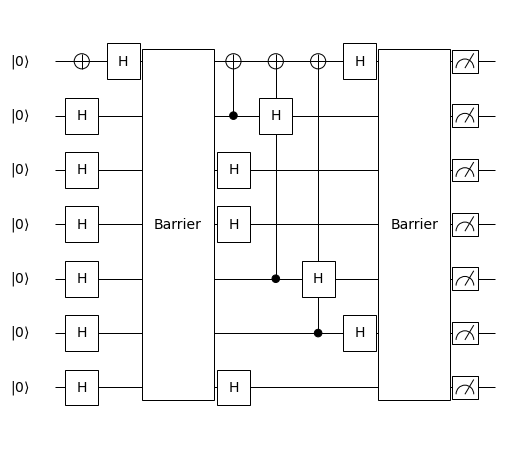

In [2]:
# Import all required objects and methods
from projectq import MainEngine
from projectq.ops import H,X,Measure,All, C, NOT, Barrier
from projectq.backends import CircuitDrawerMatplotlib, Simulator
from projectq.setups.default import get_engine_list

# Initialize engine objects for simulation and drawings
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define number of qubits and allocate them
qubit = qengine.allocate_qureg(7)

# Set the first qubit to |1>
X | qubit[0] # Apply x-gate (NOT operator)

# Apply Hadamard to all qubits
All(H) | qubit

# Apply Barrier
Barrier | qubit

# Apply CNOT - (qubit[1],qubit[0]) & (qubit[4],qubit[0]) & (qubit[5],qubit[0])
C(NOT) | (qubit[1],qubit[0])
C(NOT) | (qubit[4],qubit[0])
C(NOT) | (qubit[5],qubit[0])

# Apply Hadamard to all qubits
All(H) | qubit

# Apply Barrier
Barrier | qubit

# Flush engine to backend
qengine.flush()

# Measure Qubits
All(Measure)| qubit

# Draw Circuit and print measurements
print(qdrawer.draw())
print("Measured {}".format([int(q) for q in qubit]))